In [10]:
import Project_library as pl
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd
import jax.numpy as jnp

In [11]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = [
    'CMU Serif Roman',  # primary CMU serif face
    'Times New Roman',  # fallback
    'Georgia',
    'serif'
]
plt.rcParams['axes.grid'] = True
# 3. Set the global font size:
plt.rcParams['font.size'] = 14  # change this number to taste

# 4. (Optional) Adjust axes titles and labels separately if you like:
plt.rcParams['axes.titlesize'] = 14 
plt.rcParams['axes.labelsize'] = 14

In [18]:
results_string = "../results_sweep1748532478"


# The scripts labels for each iteration
labels = ["Initial demand", "Mode demand Variable", "Mode demand Sticky", "Expected demand Variable", "Expected demand Sticky"]


records = []


with open(results_string, "rb") as f:
    try:
        config = pkl.load(f)["Config"]  # First entry with sweeping_parameters
    except EOFError:
        raise ValueError("File is empty or incorrectly formatted.")

    while True:
        try:
            sweep_result = pkl.load(f)
            sweep_config = {
                "reconfig_period": sweep_result["reconfig_period"],
                "time_step": sweep_result["time_step"],
                "rmin": sweep_result["rmin"],
                "O": sweep_result["O"],
                "iteration": sweep_result["iteration"]
            }

            for label in labels:
                result = sweep_result["data"][label]

                record = {
                    **sweep_config,
                    "pred demand": result["pred demand"],
                    "demand" : result["demand"],
                    "rates" : result["rates"],
                    "label": label,
                    "min_capacity": float(result["min_capacity"]),
                    "avg_capacity": float(result["avg_capacity"]),
                    "min_CD": float(result["min_CD"]),
                    "avg_CD": float(result["avg_CD"]),
                    "Average_unmet_demand": float(result["Average_unmet_demand"]),
                    "maximum_unmet_demand": float(result["maximum_unmet_demand"]),
                    "disconnect time" : result["disconnect_times"],
                    "total_users": int(result["total_users"]),
                    "cells" : result["cells"]
                }
                print("Test 1")
                records.append(record)
                break
            break
        
        except EOFError:
            break

df = pd.DataFrame(records)

Test 1


In [19]:
df

,reconfig_period,time_step,rmin,O,iteration,pred demand,demand,rates,label,min_capacity,avg_capacity,min_CD,avg_CD,Average_unmet_demand,maximum_unmet_demand,disconnect time,total_users,cells
0,1,0.001,0,2,0,"[2700000.0, 700000.0, 500000.0, 800000.0, 7000...","[2700000.0, 700000.0, 500000.0, 800000.0, 7000...","[205073150.0, 205730100.0, 206062400.0, 206062...",Initial demand,1081094.0,9252775.0,8.845477,9.028564,0.0,0.0,"[[0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",4629,"[[(-0.0930663, -0.0930663, [], [], 10, 0, [Use..."


Processing rmin: 0
Processing rmin: 50000


ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

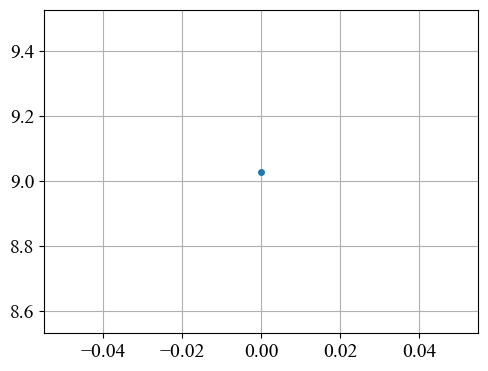

In [ ]:
sticky_transitions = jnp.array([[1-0.7, 0.7],
                                         [0.3, 1-0.3]])

variable_transitions = jnp.array([[1-0.07, 0.07], 
                                 [0.03, 1-0.03 ]])


fig = plt.figure(figsize=(5.6, 4.2))

# Lets first plot without demand, transitions
for rmin in config["rmin"]:
    print(f"Processing rmin: {rmin}")
    
    # Extract the for only the default version, that uses intial demands as the prediction
    df_default = df[(df["rmin"] == rmin )& (df["label"] == "Initial demand")]



    # Plot the average capacity to demand ratio
    plt.plot(rmin, df_default["avg_CD"],
             label=f"rmin = {rmin}",
             marker='o',
             linestyle='-',
             markersize=4,
             linewidth=1.5)

plt.xlabel("Average capacity to demand ratio")
plt.ylabel("Average capacity / Demand") 